# 02_Profitability_Analysis.ipynb

## Title: "Profitability Metrics Analysis"`

### Contents:
- Importing libraries.
- Functions for data retrieval and flattening.
- API requests to SEC for company data.
- Data inspection and manipulation.

---

# Set Up the Environment

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [2]:
from prepare_and_sort_data_quarterly import prepare_and_sort_financial_data

# Load Data

## Load Data from CSV File

In [3]:
raw_data = pd.read_csv('combined_df.csv')

In [4]:
# Inspect the first few rows of the dataset
raw_data.head(5)

,EntityName,CIK,Metric,start,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,OperatingIncomeLoss,2007-01-01,2007-12-31,5830000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,CY2007
1,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-01-01,2008-06-30,3046000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN
2,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-04-01,2008-06-30,1247000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,CY2008Q2
3,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-01-01,2008-09-30,4193000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,NaN
4,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-07-01,2008-09-30,1147000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,CY2008Q3


In [5]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [6]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  834 non-null    object        
 1   CIK         834 non-null    int64         
 2   Metric      834 non-null    object        
 3   start       834 non-null    object        
 4   end         834 non-null    datetime64[ns]
 5   val         834 non-null    int64         
 6   accn        834 non-null    object        
 7   fy          834 non-null    int64         
 8   fp          834 non-null    object        
 9   form        834 non-null    object        
 10  filed       834 non-null    object        
 11  frame       225 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 78.3+ KB


# Individual Metrics Analysis

## Analysis of Operating Income/Loss

In [7]:
# Filter out the operating income/loss data
operating_income_loss = raw_data[raw_data['Metric'] == 'OperatingIncomeLoss']

In [8]:
operating_income_loss_data = prepare_and_sort_financial_data(raw_data, 'OperatingIncomeLoss')

In [9]:
operating_income_loss_data.head(10)

,EntityName,CIK,Metric,start,end,val,year,quarter
2,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-04-01,2008-06-30,1247000000,2008,Q2
4,THE BOEING COMPANY,12927,OperatingIncomeLoss,2008-07-01,2008-09-30,1147000000,2008,Q3
8,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-01-01,2009-03-31,1025000000,2009,Q1
13,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-04-01,2009-06-30,1529000000,2009,Q2
18,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-07-01,2009-09-30,-2151000000,2009,Q3
22,THE BOEING COMPANY,12927,OperatingIncomeLoss,2009-10-01,2009-12-31,1693000000,2009,Q4
26,THE BOEING COMPANY,12927,OperatingIncomeLoss,2010-01-01,2010-03-31,1174000000,2010,Q1
32,THE BOEING COMPANY,12927,OperatingIncomeLoss,2010-04-01,2010-06-30,1307000000,2010,Q2
38,THE BOEING COMPANY,12927,OperatingIncomeLoss,2010-07-01,2010-09-30,1387000000,2010,Q3
43,THE BOEING COMPANY,12927,OperatingIncomeLoss,2010-10-01,2010-12-31,1103000000,2010,Q4


In [10]:
print(operating_income_loss_data.describe())

           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-01-10 08:56:56.949152512  9.073898e+08
min    12927.0            2008-06-30 00:00:00 -8.049000e+09
25%    12927.0            2012-05-15 12:00:00  5.545000e+08
50%    12927.0            2015-12-31 00:00:00  1.529000e+09
75%    12927.0            2019-08-15 00:00:00  1.911000e+09
max    12927.0            2023-09-30 00:00:00  4.175000e+09
std        0.0                            NaN  1.943109e+09


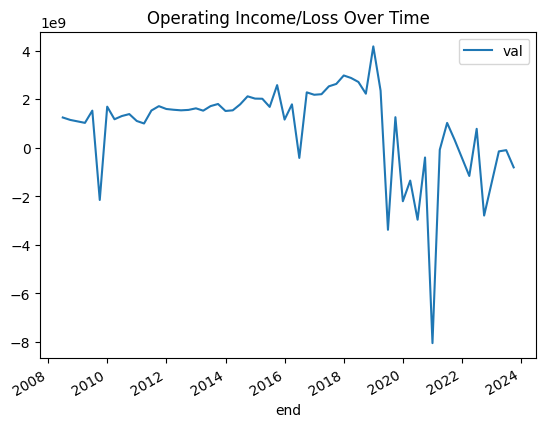

In [11]:
operating_income_loss_data.plot(x='end', y='val', title='Operating Income/Loss Over Time')
plt.show()

## Analysis of Revenues

In [12]:
revenues = raw_data[raw_data['Metric'] == 'Revenues']

In [13]:
revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')

In [14]:
revenues_data.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
280,THE BOEING COMPANY,12927,Revenues,2008-04-01,2008-06-30,16962000000,2008,Q2
282,THE BOEING COMPANY,12927,Revenues,2008-07-01,2008-09-30,15293000000,2008,Q3
286,THE BOEING COMPANY,12927,Revenues,2009-01-01,2009-03-31,16502000000,2009,Q1
291,THE BOEING COMPANY,12927,Revenues,2009-04-01,2009-06-30,17154000000,2009,Q2
296,THE BOEING COMPANY,12927,Revenues,2009-07-01,2009-09-30,16688000000,2009,Q3


           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-01-10 08:56:56.949152512  1.971341e+10
min    12927.0            2008-06-30 00:00:00  1.180700e+10
25%    12927.0            2012-05-15 12:00:00  1.661550e+10
50%    12927.0            2015-12-31 00:00:00  1.955500e+10
75%    12927.0            2019-08-15 00:00:00  2.316850e+10
max    12927.0            2023-09-30 00:00:00  2.834100e+10
std        0.0                            NaN  3.790732e+09


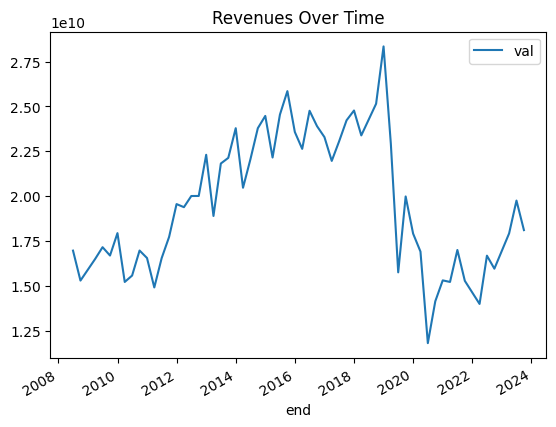

In [15]:
print(revenues_data.describe())
revenues_data.plot(x='end', y='val', title='Revenues Over Time')
plt.show()


## Analysis of Net Income/Loss

In [16]:
# Filter out the operating income/loss data
net_income_loss = raw_data[raw_data['Metric'] == 'NetIncomeLoss']

In [17]:
net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')

In [18]:
net_income_loss_data.head()

,EntityName,CIK,Metric,start,end,val,year,quarter
558,THE BOEING COMPANY,12927,NetIncomeLoss,2008-04-01,2008-06-30,852000000,2008,Q2
560,THE BOEING COMPANY,12927,NetIncomeLoss,2008-07-01,2008-09-30,695000000,2008,Q3
564,THE BOEING COMPANY,12927,NetIncomeLoss,2009-01-01,2009-03-31,610000000,2009,Q1
569,THE BOEING COMPANY,12927,NetIncomeLoss,2009-04-01,2009-06-30,998000000,2009,Q2
574,THE BOEING COMPANY,12927,NetIncomeLoss,2009-07-01,2009-09-30,-1564000000,2009,Q3


           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-01-10 08:56:56.949152512  5.768814e+08
min    12927.0            2008-06-30 00:00:00 -8.420000e+09
25%    12927.0            2012-05-15 12:00:00  4.200000e+07
50%    12927.0            2015-12-31 00:00:00  9.980000e+08
75%    12927.0            2019-08-15 00:00:00  1.377500e+09
max    12927.0            2023-09-30 00:00:00  3.424000e+09
std        0.0                            NaN  1.781617e+09


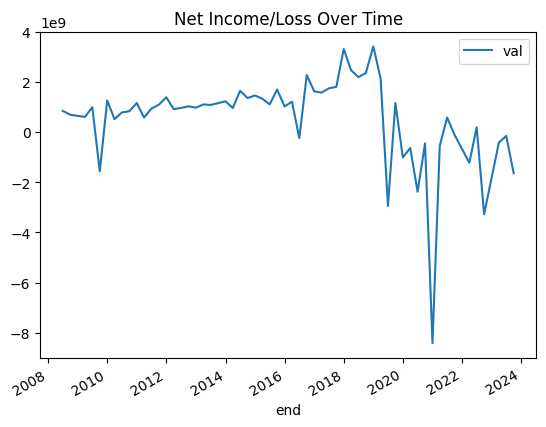

In [19]:
print(net_income_loss_data.describe())
net_income_loss_data.plot(x='end', y='val', title='Net Income/Loss Over Time')
plt.show()


# Merge the Data

In [20]:
df_merged = pd.merge(net_income_loss_data, operating_income_loss_data, 
                     on=['EntityName', 'CIK', 'start', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_net_income', '_operating_income'))

In [21]:
df_merged = pd.merge(df_merged, revenues_data, 
                     on=['EntityName', 'CIK', 'start', 'end', 'year', 'quarter'], 
                     how='outer')

In [22]:
df_merged.rename(columns={'val_net_income': 'NetIncomeLoss', 
                          'val_operating_income': 'OperatingIncomeLoss', 
                          'val': 'Revenues'}, inplace=True)

In [23]:
df_merged.head(5)

,EntityName,CIK,Metric_net_income,start,end,NetIncomeLoss,year,quarter,Metric_operating_income,OperatingIncomeLoss,Metric,Revenues
0,THE BOEING COMPANY,12927,NetIncomeLoss,2008-04-01,2008-06-30,852000000,2008,Q2,OperatingIncomeLoss,1247000000,Revenues,16962000000
1,THE BOEING COMPANY,12927,NetIncomeLoss,2008-07-01,2008-09-30,695000000,2008,Q3,OperatingIncomeLoss,1147000000,Revenues,15293000000
2,THE BOEING COMPANY,12927,NetIncomeLoss,2009-01-01,2009-03-31,610000000,2009,Q1,OperatingIncomeLoss,1025000000,Revenues,16502000000
3,THE BOEING COMPANY,12927,NetIncomeLoss,2009-04-01,2009-06-30,998000000,2009,Q2,OperatingIncomeLoss,1529000000,Revenues,17154000000
4,THE BOEING COMPANY,12927,NetIncomeLoss,2009-07-01,2009-09-30,-1564000000,2009,Q3,OperatingIncomeLoss,-2151000000,Revenues,16688000000


# Calculation

**Profitability:**
    
    - `NetIncomeLoss`
    - `Revenues`
    - `OperatingIncomeLoss`
    - **Calculation:** Compare net income to revenue for profit margin. Operating income gives insight into operational efficiency.

In [24]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [25]:
# Convert financial values from cents to millions for readability
df_final['NetIncomeLoss'] /= 1000000
df_final['Revenues'] /= 1000000
df_final['OperatingIncomeLoss'] /= 1000000

In [26]:
# Calculate Profit Margin where data is available
df_final['ProfitMarginPercent'] = df_final.apply(
    lambda row: (row['NetIncomeLoss'] / row['Revenues']) * 100 
    if pd.notna(row['NetIncomeLoss']) and pd.notna(row['Revenues']) and row['Revenues'] != 0 
    else None, axis=1)

In [27]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'NetIncomeLoss', 'Revenues', 'OperatingIncomeLoss', 'ProfitMarginPercent', 'year', 'quarter']]
df_final.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE', 'year': 'Year', 'quarter': 'Quarter'}, inplace=True)


In [30]:
# Display the first few rows of the final DataFrame
df_final.head(5)

,ENTITY,CIK,DATE,NetIncomeLoss,Revenues,OperatingIncomeLoss,ProfitMarginPercent,Year,Quarter
0,THE BOEING COMPANY,12927,2008-06-30,852.0,16962.0,1247.0,5.022993,2008,Q2
1,THE BOEING COMPANY,12927,2008-09-30,695.0,15293.0,1147.0,4.544563,2008,Q3
2,THE BOEING COMPANY,12927,2009-03-31,610.0,16502.0,1025.0,3.696522,2009,Q1
3,THE BOEING COMPANY,12927,2009-06-30,998.0,17154.0,1529.0,5.817885,2009,Q2
4,THE BOEING COMPANY,12927,2009-09-30,-1564.0,16688.0,-2151.0,-9.372004,2009,Q3


# Visualization

It seems 2020 had a bumpy ride for both health and aviation! ✈️😷

| ENTITY             | Net Income/Loss | Revenues | Operating Income/Loss | Profit Margin Percent | Quarter |
|--------------------|-----------------|----------|------------------------|-----------------------|---------|
| THE BOEING COMPANY | -8420.0         | 15304.0  | -8049.0                | -55.018296            | 2020-Q4 |


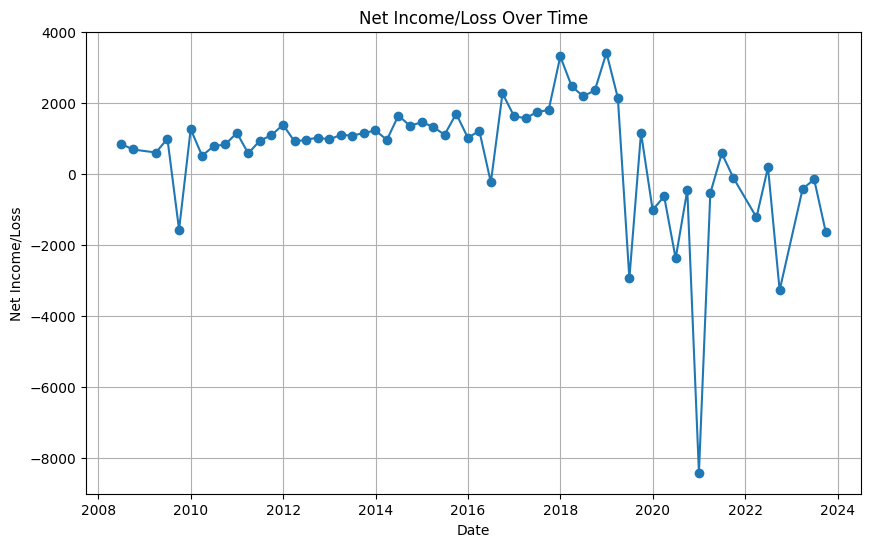

In [29]:
import matplotlib.pyplot as plt

# Filter the DataFrame for NetIncomeLoss and DATE columns
net_income_data = df_final[['DATE', 'NetIncomeLoss']].copy() 

# Set 'DATE' as the index for time-based plotting
net_income_data.set_index('DATE', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(net_income_data.index, net_income_data['NetIncomeLoss'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Net Income/Loss')
plt.title('Net Income/Loss Over Time')
plt.grid(True)
plt.show()


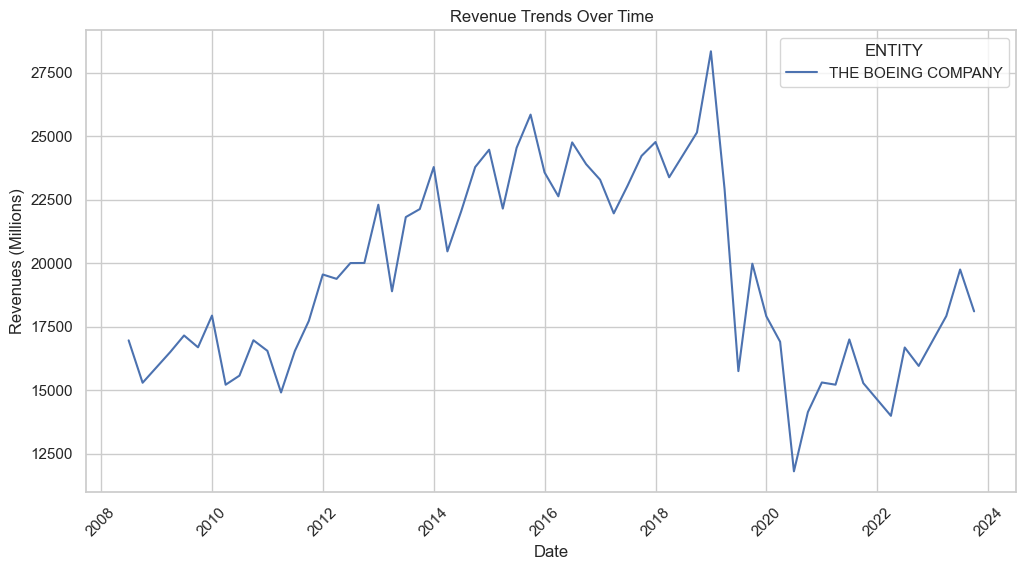

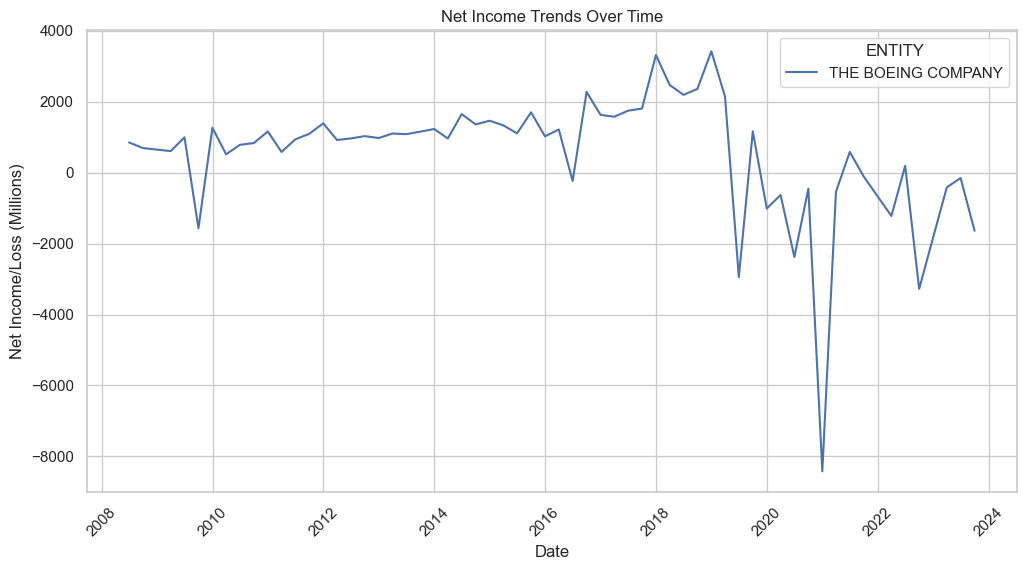

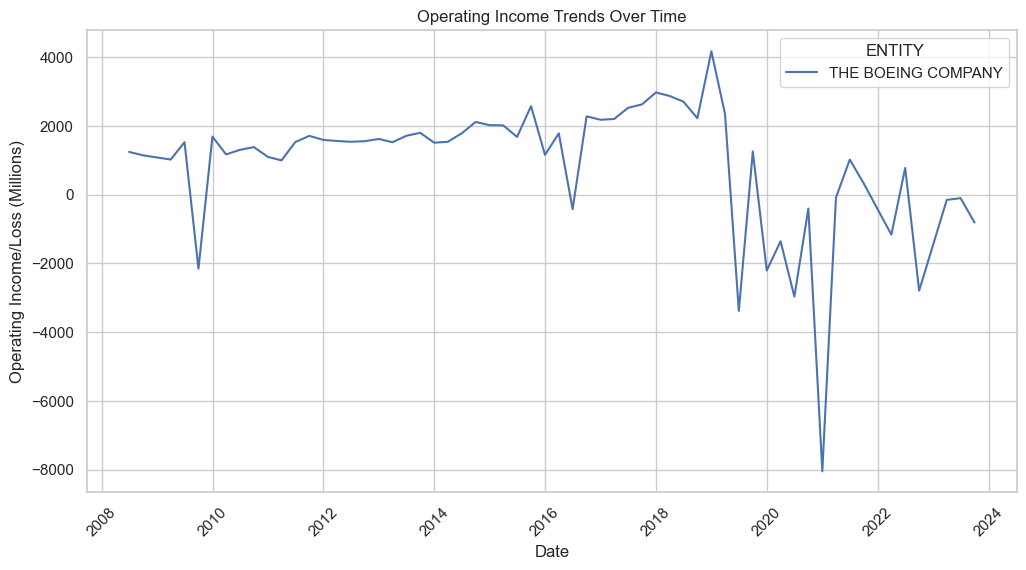

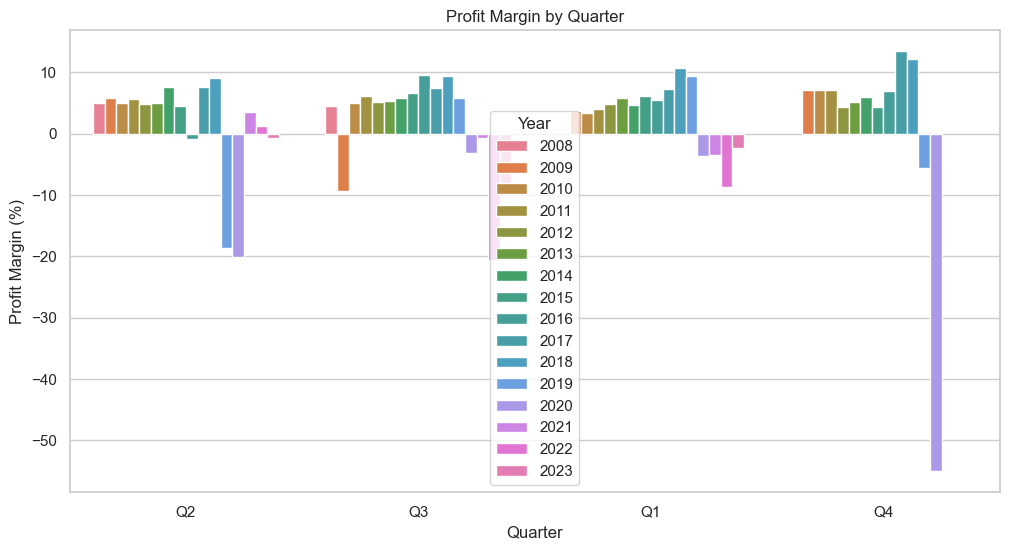

In [31]:
import seaborn as sns

# Plotting
sns.set(style="whitegrid")

# Revenue Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final, x='DATE', y='Revenues', hue='ENTITY')
plt.title('Revenue Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Revenues (Millions)')
plt.xticks(rotation=45)
plt.show()

# Net Income Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final, x='DATE', y='NetIncomeLoss', hue='ENTITY')
plt.title('Net Income Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Net Income/Loss (Millions)')
plt.xticks(rotation=45)
plt.show()

# Operating Income Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final, x='DATE', y='OperatingIncomeLoss', hue='ENTITY')
plt.title('Operating Income Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Operating Income/Loss (Millions)')
plt.xticks(rotation=45)
plt.show()

# Profit Margin Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='Quarter', y='ProfitMarginPercent', hue='Year')
plt.title('Profit Margin by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Profit Margin (%)')
plt.show()

In [34]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Financial Dashboard: THE BOEING COMPANY", style={'text-align': 'center'}),

    # Dropdown for metric selection
    html.Div([
        html.Label("Select Financial Metric:"),
        dcc.Dropdown(
            id='metric-select-dropdown',
            options=[
                {'label': 'Net Income/Loss', 'value': 'NetIncomeLoss'},
                {'label': 'Revenues', 'value': 'Revenues'},
                {'label': 'Operating Income/Loss', 'value': 'OperatingIncomeLoss'},
                {'label': 'Profit Margin Percent', 'value': 'ProfitMarginPercent'}
            ],
            value='NetIncomeLoss'  # Default value
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Date Range Picker
    html.Div([
        html.Label("Select Date Range:"),
        dcc.DatePickerRange(
            id='date-range-picker',
            min_date_allowed=df_final['DATE'].min(),
            max_date_allowed=df_final['DATE'].max(),
            start_date=df_final['DATE'].min(),
            end_date=df_final['DATE'].max()
        )
    ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),

    # Time Series Chart
    dcc.Graph(id='time-series-chart'),

    # Additional Charts
    html.Div([
        dcc.Graph(id='revenue-vs-netincome-chart'),
        dcc.Graph(id='operating-income-chart'),
    ], style={'columnCount': 2})
])

# Callback to update time series chart based on selections
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('metric-select-dropdown', 'value'),
     Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_time_series(selected_metric, start_date, end_date):
    filtered_df = df_final[(df_final['DATE'] >= start_date) & (df_final['DATE'] <= end_date)]
    fig = px.line(filtered_df, x='DATE', y=selected_metric, title=f'{selected_metric} Over Time')
    return fig

# Callback for Revenue vs Net Income Chart
@app.callback(
    Output('revenue-vs-netincome-chart', 'figure'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_revenue_net_income_chart(start_date, end_date):
    filtered_df = df_final[(df_final['DATE'] >= start_date) & (df_final['DATE'] <= end_date)]
    fig = px.scatter(filtered_df, x='Revenues', y='NetIncomeLoss', color='Year',
                     title='Revenues vs Net Income')
    return fig

# Callback for Operating Income Chart
@app.callback(
    Output('operating-income-chart', 'figure'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_operating_income_chart(start_date, end_date):
    filtered_df = df_final[(df_final['DATE'] >= start_date) & (df_final['DATE'] <= end_date)]
    fig = px.bar(filtered_df, x='DATE', y='OperatingIncomeLoss', color='Quarter',
                 title='Operating Income by Quarter')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


: 